# Python for Data Science: Split-Apply-Combine, GroupBy, and Pivot Tables


This notebook covers key Pandas concepts including:

1. **Split-Apply-Combine**: A strategy to divide, apply functions, and recombine data.
2. **GroupBy**: A method to aggregate and transform data efficiently.
3. **Pivot Tables**: A powerful tool to reshape and summarize data.

Let's explore each concept with examples.


## 1. Split-Apply-Combine Concept
The Split-Apply-Combine strategy is commonly used in data science to break down a problem into smaller parts, apply functions to subsets of data, and then recombine results.

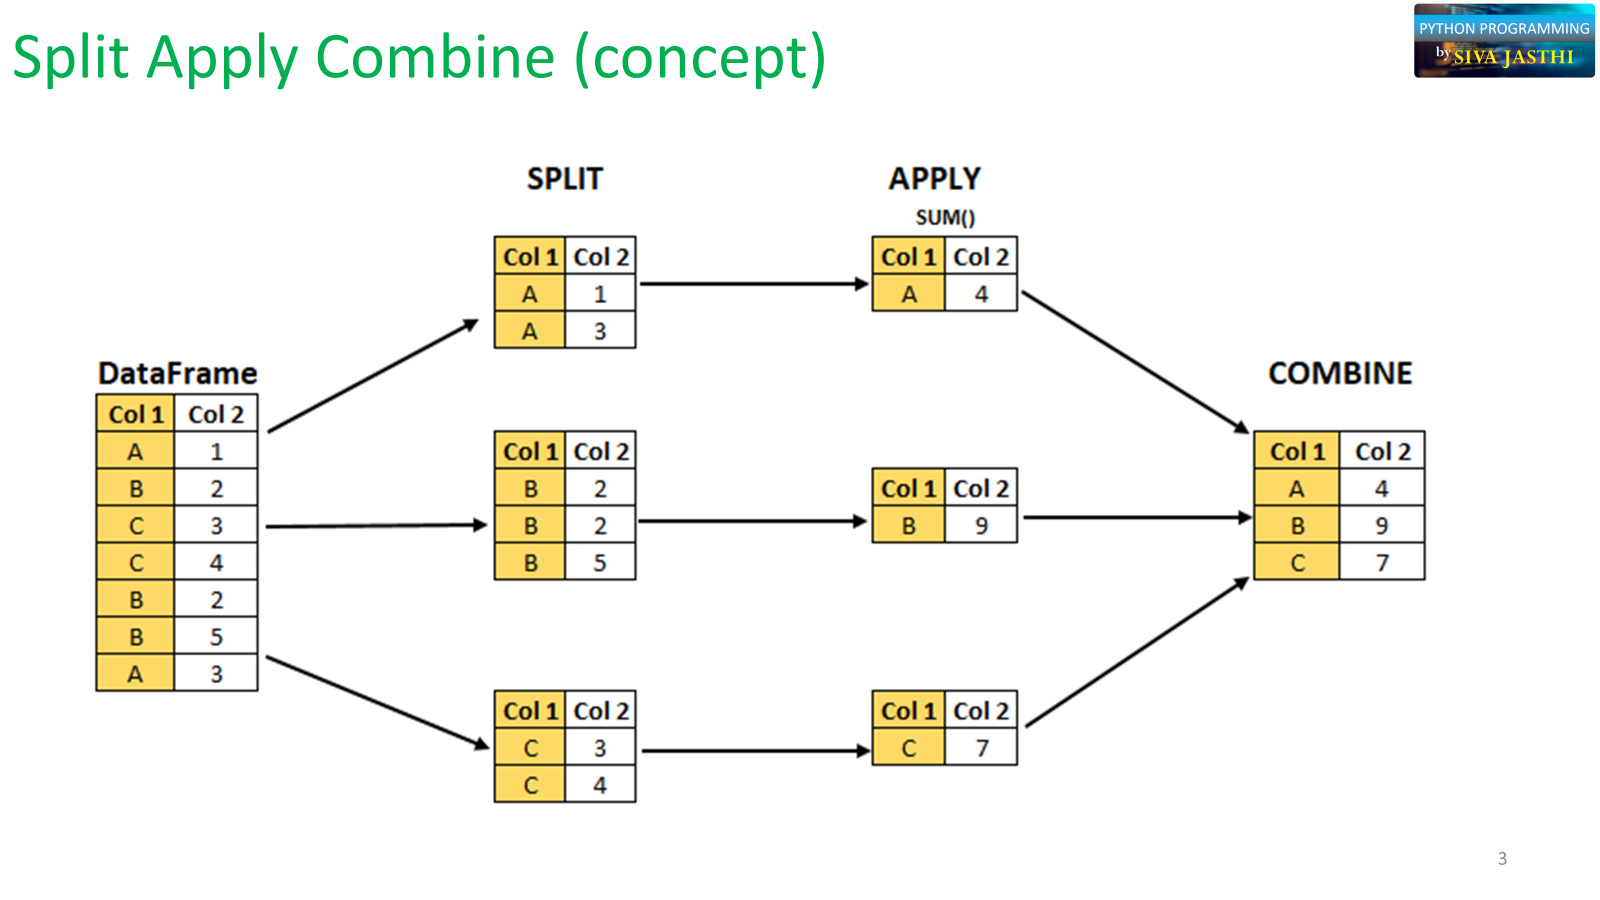

In [ ]:
#@title split-apply-combine (example 1)
import pandas as pd

# Sample dataset
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [60000, 62000, 75000, 78000, 80000, 82000]
}
df = pd.DataFrame(data)

display(df)

# Split-Apply-Combine using GroupBy
result = df.groupby('Department')['Salary'].mean()
print(result)


,Department,Employee,Salary
0,HR,Alice,60000
1,HR,Bob,62000
2,IT,Charlie,75000
3,IT,David,78000
4,Finance,Eve,80000
5,Finance,Frank,82000


Department
Finance    81000.0
HR         61000.0
IT         76500.0
Name: Salary, dtype: float64


In [ ]:
#@title split-apply-combine (example 2)
import pandas as pd

# Sample dataset
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [60000, 62000, 75000, 78000, 80000, 82000]
}
df = pd.DataFrame(data)

# Split-Apply-Combine using GroupBy
result = df.groupby('Department')['Salary'].max()
print(result)


Department
Finance    82000
HR         62000
IT         78000
Name: Salary, dtype: int64


,Salary
Department,
Finance,2
HR,2
IT,2


## 2. GroupBy (most common method)
`groupby()` is a powerful function for aggregation, transformation, and filtering.

In [ ]:
#@title Grouping by Department and calculating total salary
salary_sum = df.groupby('Department')['Salary'].sum()
display(salary_sum)



,Salary
Department,
Finance,162000
HR,122000
IT,153000


,mean,sum,count
Department,,,
Finance,81000.0,162000,2
HR,61000.0,122000,2
IT,76500.0,153000,2


In [ ]:
#@title Applying multiple functions using agg()
salary_stats = df.groupby('Department')['Salary'].agg(['mean', 'max', 'sum', 'count'])
display(salary_stats)

,mean,max,sum,count
Department,,,,
Finance,81000.0,82000,162000,2
HR,61000.0,62000,122000,2
IT,76500.0,78000,153000,2


In [ ]:
#@title titanic: Group by Embarked (Max Fare by location)
raw_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
df = pd.read_csv(raw_url)

grouped_data = df.groupby('Embarked').agg({'Fare': 'max'})
display(grouped_data)

# Average age of survivors vs non-survivors
grouped_data = df.groupby('Survived').agg({'Age': 'mean'})
display(grouped_data)

# Fare greater than 60
grouped_data = df.groupby('Pclass').agg({'Fare': lambda x: (x > 60).sum()})
display(grouped_data)

# count of embarked
grouped_data = df.groupby('Embarked').agg({'Name': 'count'})
display(grouped_data)

,Fare
Embarked,
C,512.3292
Q,90.0000
S,263.0000


,Age
Survived,
0,30.626179
1,28.343690


,Fare
Pclass,
1,108
2,7
3,7


,Name
Embarked,
C,168
Q,77
S,644


In [ ]:
#@title titanic: Group by 'Pclass' and calculate average fare and age


display(df)
#Group by 'Pclass' and calculate average fare and age
grouped_data = df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'mean'})
display(grouped_data)


grouped_data = df.groupby('Pclass').agg({'Fare': 'max', 'Age': 'min'})
display(grouped_data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,Fare,Age
Pclass,,
1,84.154687,38.233441
2,20.662183,29.877630
3,13.675550,25.140620


,Fare,Age
Pclass,,
1,512.3292,0.92
2,73.5000,0.67
3,69.5500,0.42


In [ ]:
#@title Nested Grouping
# Survival count based on sex and class


grouped_data = df.groupby(['Pclass']).agg({'Survived': 'count'})
display(grouped_data)

grouped_data = df.groupby(['Pclass', 'Sex']).agg({'Survived': 'count'})
display(grouped_data)

grouped_data = df.groupby(['Sex', 'Pclass']).agg({'Survived': 'count'})
display(grouped_data)

,Survived
Pclass,
1,216
2,184
3,491


Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

## 3. Pivot Tables in Pandas
Pivot Tables help reshape and summarize data.

In [ ]:
#@title Creating a Pivot Table


# Sample dataset
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [60000, 62000, 75000, 78000, 80000, 82000]
}
df = pd.DataFrame(data)

pivot_table = df.pivot_table(values='Salary', index='Department', aggfunc='mean')
display(pivot_table)

pivot_table = df.pivot_table(values='Salary', index='Department')
display(pivot_table)


,Salary
Department,
Finance,81000.0
HR,61000.0
IT,76500.0


,Salary
Department,
Finance,81000.0
HR,61000.0
IT,76500.0


In [ ]:
#@title Adding more dimensions to the Pivot Table
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [60000, 62000, 75000, 78000, 80000, 82000],
    'Experience': [5, 7, 10, 12, 15, 18]
}
df = pd.DataFrame(data)

# Creating a Pivot Table with multiple aggregations
pivot_table = df.pivot_table(values=['Salary', 'Experience'], index='Department', aggfunc={'Salary': 'mean', 'Experience': 'sum'})
print(pivot_table)


            Experience   Salary
Department                     
Finance             33  81000.0
HR                  12  61000.0
IT                  22  76500.0


In [ ]:
#@title titanic: pivot table (example 1 - default agg function)
raw_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
df = pd.read_csv(raw_url)

# Create a pivot table summarizing survival rates by 'Sex' and 'Pclass'
# Aggregate function is mean by default

pivot_table = df.pivot_table(
    values='Survived',
    index='Sex',
    columns='Pclass',
    fill_value=0
)
display(pivot_table)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#@title titanic: pivot table (example 1 - explicit agg (count) function)
pivot_table = df.pivot_table(
    values='Survived',
    index='Sex',
    columns='Pclass',
    aggfunc='count',
    fill_value=0
)
display(pivot_table)


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [ ]:
#@title titanic: pivot table (example 3 - Column level aggregation)
pivot_table = df.pivot_table(
    values='Survived',
    index='Sex',
    aggfunc='count',
    fill_value=0
)
display(pivot_table)

,Survived
Sex,
female,314
male,577


In [ ]:
#@title titanic: pivot table (example 3 - Column level aggregation)
pivot_table = df.pivot_table(
    index='Sex',
    columns = "Embarked",
    values='Survived',
    aggfunc='count',
    fill_value=0
)
display(pivot_table)

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [ ]:
#@title titanic: pivot table (example 4 - switching the index and columns)
pivot_table = df.pivot_table(
    values='Survived',
    index='Embarked',
    aggfunc='count',
    columns = "Pclass",
    fill_value=0
)
display(pivot_table)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [ ]:
#@title titanic: pivot table (example 2)
# Create a pivot table summarizing count of people boarded at different places by the passenger class
pivot_table = df.pivot_table(
    values='Sex',
    index='Embarked',
    columns='Pclass',
    aggfunc='count',
    fill_value=0
)
display(pivot_table)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [ ]:
#@title titanic: Several examples

#@title titanic: Average fare by pclass and embarked location
pivot_table = df.pivot_table(
    values='Fare',
    index='Embarked',
    columns='Pclass',
    aggfunc='mean',
    fill_value=0
)
display(pivot_table)

#@title titanic:  Count of survived by embarked and pclass
pivot_table = df.pivot_table(
    values = 'Survived',
    index='Embarked',
    columns='Pclass',
    aggfunc='sum',
    fill_value=0
)
display(pivot_table)

#@title titanic:  Max fare by sex and pclass
pivot_table = df.pivot_table(
    values='Fare',
    index='Sex',
    columns='Pclass',
    aggfunc='max',
    fill_value=0
)
display(pivot_table)

#@title titanic:  Total Number of siblings by sex and pclass
pivot_table = df.pivot_table(
    values='SibSp',
    index='Sex',
    columns='Pclass',
    aggfunc='sum',
    fill_value=0
)
display(pivot_table)

Pclass,1,2,3
Embarked,,,
C,104.718529,25.358335,11.214083
Q,90.000000,12.350000,11.183393
S,70.364862,20.327439,14.644083


Pclass,1,2,3
Embarked,,,
C,59,9,25
Q,1,2,27
S,74,76,67


Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


Pclass,1,2,3
Sex,,,
female,52,37,129
male,38,37,173


## pd.cut and pd.qcut
Both pd.cut and pd.qcut are used to bin continuous data into discrete intervals. However, they differ in how they create these bins:

pd.cut: Bins data into equal-width intervals based on the range of the data.

pd.qcut: Bins data into intervals based on quantiles, ensuring each bin has approximately the same number of observations.

Below is a comprehensive example demonstrating how to use both pd.cut and pd.qcut in practice.

In [ ]:
#@title pd.cut
import pandas as pd

# Sample data
data = [39, 36,38, 37, 23, 37, 2, 5, 8, 10, 15, 18, 20, 25, 30, 35]
df = pd.DataFrame({'values': data})

# Using pd.cut() to create bins
df['cut_bins'] = pd.cut(df['values'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Medium', 'High', 'Very High'])

print(df)


    values   cut_bins
0       39  Very High
1       36  Very High
2       38  Very High
3       37  Very High
4       23       High
5       37  Very High
6        2        Low
7        5        Low
8        8        Low
9       10        Low
10      15     Medium
11      18     Medium
12      20     Medium
13      25       High
14      30       High
15      35  Very High


<Axes: xlabel='cut_bins'>

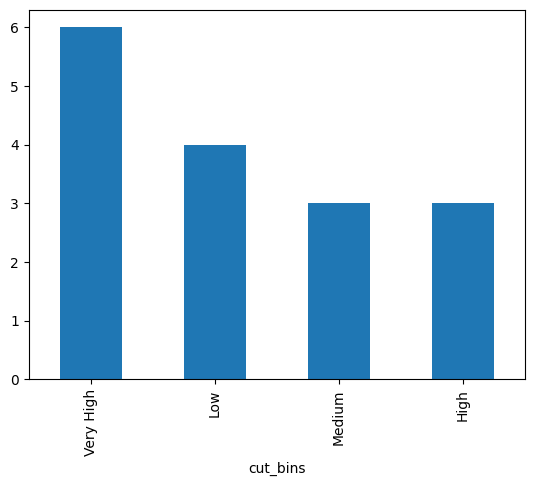

In [ ]:
#@title pd.cut visualization (unsorted)
# Using Pandas built-in plot for visualization
df['cut_bins'].value_counts().plot(kind='bar')

<Axes: xlabel='cut_bins'>

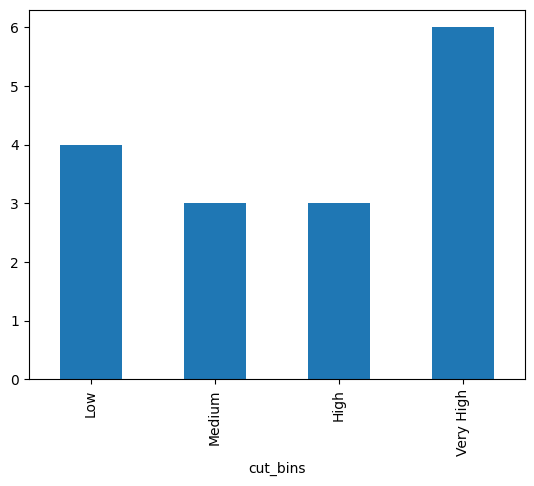

In [ ]:
#@title pd.cut visualization (sorted)
# Using Pandas built-in plot for visualization
df['cut_bins'].value_counts().sort_index().plot(kind='bar')

In [ ]:
#@title pd.qcut
import pandas as pd

# Sample data
data = [2, 24, 32, 5, 8, 10, 15, 18, 20, 25, 30, 35]
# add these to the mix 56, 78, 90, 120,
df = pd.DataFrame({'values': data})

# Using pd.qcut() to create 4 quantile bins
df['qcut_bins'] = pd.qcut(df['values'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print(df)


    values qcut_bins
0        2        Q1
1       24        Q2
2       56        Q4
3       78        Q4
4       90        Q4
5      120        Q4
6       32        Q3
7        5        Q1
8        8        Q1
9       10        Q1
10      15        Q2
11      18        Q2
12      20        Q2
13      25        Q3
14      30        Q3
15      35        Q3


<Axes: xlabel='qcut_bins'>

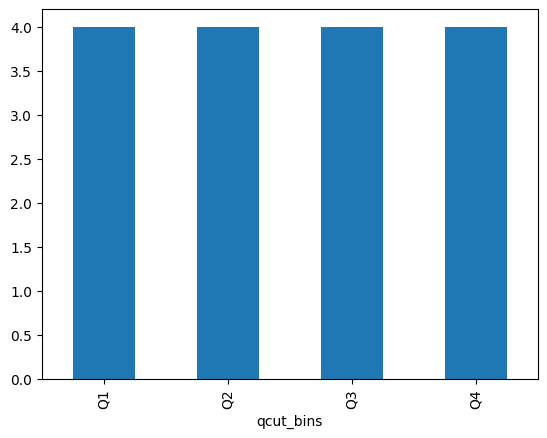

In [ ]:
#@title pd.qcut visualization
# Using Pandas built-in plot for visualization
df['qcut_bins'].value_counts().plot(kind='bar')


##apply with Custom Functions
The apply method can be used to apply a custom function to each group after splitting the data.

In [ ]:
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Custom function for salary statistics
def salary_stats(group):
    return pd.Series({
        'mean_salary': group['salary'].mean(),
        'max_salary': group['salary'].max(),
        'min_salary': group['salary'].min()
    })

# Explicitly drop 'age_group' column before applying the function to avoid the warning
result = df.drop(columns=['age_group']).groupby(df['age_group'], observed=False).apply(salary_stats)

# Fill NaN values with 0 for groups with no data
result.fillna(0, inplace=True)

# Display result
print(result)


           mean_salary  max_salary  min_salary
age_group                                     
20s        3100.000000      3200.0      3000.0
30s        4250.000000      4500.0      4000.0
40s        5500.000000      5800.0      5200.0
50s        6466.666667      7000.0      6000.0
60s           0.000000         0.0         0.0


In [ ]:
#@title apply (a custom function)

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Custom function for salary statistics
def salary_stats(group):
    return pd.Series({
        'mean_salary': group['salary'].mean(),
        'max_salary': group['salary'].max(),
        'min_salary': group['salary'].min()
    })

# Use include_groups=False to exclude the grouping column automatically
result = df.groupby('age_group', observed=False).apply(salary_stats, include_groups=False)

# Fill NaN values with 0 for groups with no data
result.fillna(0, inplace=True)

# Display result
display(result)


,mean_salary,max_salary,min_salary
age_group,,,
20s,3100.000000,3200.0,3000.0
30s,4250.000000,4500.0,4000.0
40s,5500.000000,5800.0,5200.0
50s,6466.666667,7000.0,6000.0
60s,0.000000,0.0,0.0


##transform
The transform method is used to apply a function to each group and return a DataFrame with the same shape as the input. This is useful for group-specific transformations.

In [ ]:
#@title transform (for scaling, normalization)
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Define a normalization function: (x - min) / (max - min)
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply transform() to normalize salaries within each age group
df['normalized_salary'] = df.groupby('age_group')['salary'].transform(normalize)

# Display the updated DataFrame
print(df[['name', 'age_group', 'salary', 'normalized_salary']])


## filter
The filter method is used to filter groups based on a condition. It returns a subset of the original DataFrame.

In [ ]:
#@title filter
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

display(df)
# Use filter() to keep only groups where at least one person earns more than $5000
filtered_df = df.groupby('age_group', observed=False).filter(lambda x: (x['salary'] > 5000).any())

# Display the filtered DataFrame
display(filtered_df)

,name,age,salary,age_group
0,Alice,22,3000,20s
1,Bob,25,3200,20s
2,Charlie,47,5800,40s
3,David,51,6000,50s
4,Emma,35,4500,30s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s
8,Ian,28,3100,20s
9,Jack,33,4000,30s


,name,age,salary,age_group
2,Charlie,47,5800,40s
3,David,51,6000,50s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s


## melt method
Sometimes, reshaping data is necessary before applying transformations.

melt() helps convert wide data into long format.
pivot() helps reshape it back into the desired format.

In [ ]:
#@title melt
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Use filter() to keep only groups where at least one person earns more than $5000
filtered_df = df.groupby('age_group', observed=False).filter(lambda x: (x['salary'] > 5000).any())

# Reshape data using melt()
melted_df = pd.melt(df, id_vars=['name', 'age_group'], value_vars=['age', 'salary'], var_name='Attribute', value_name='Value')

# Display the melted DataFrame
print(melted_df)


       name age_group Attribute  Value
0     Alice       20s       age     22
1       Bob       20s       age     25
2   Charlie       40s       age     47
3     David       50s       age     51
4      Emma       30s       age     35
5     Frank       50s       age     60
6     Grace       40s       age     42
7    Hannah       50s       age     55
8       Ian       20s       age     28
9      Jack       30s       age     33
10    Alice       20s    salary   3000
11      Bob       20s    salary   3200
12  Charlie       40s    salary   5800
13    David       50s    salary   6000
14     Emma       30s    salary   4500
15    Frank       50s    salary   7000
16    Grace       40s    salary   5200
17   Hannah       50s    salary   6400
18      Ian       20s    salary   3100
19     Jack       30s    salary   4000


## resample (for Time Series Data)
If you’re working with time series data, the resample method can be used to split the data into time-based groups (e.g., daily, monthly) and apply functions.

In [ ]:
#@title (will be covered later) resample


## Summary
- The **Split-Apply-Combine** concept helps in breaking down complex data problems.
- `groupby()` is useful for **aggregations** and **transformations** on datasets.
- **Pivot Tables** allow for **reshaping** and **summarization** of data.

These concepts are fundamental in data analysis using Pandas and help in handling large datasets efficiently.
